# Welcome to my notebook for the Spaceship Titanic competition !

This is a simple approach about how to explore this dataset and handle prediction. The main goal of this notebook is to use a common method to fill missing value and then compare it to a nearest neighbor method (KnnImputer).



In [17]:
%load_ext autoreload
%autoreload 2

# **Dependencies**

In [63]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import webcolors

import sys
sys.path.append("../..")
import utilities_plot as up
import utilities

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


### Import dataset

In [83]:
## datasets importation

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Some data visualisation

/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities_plot.py:425: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='labels', y='values', data=data, palette=colors, ax=ax, edgecolor='black', linewidth=1.5)
/var/folders/vc/kyc23w1d2xv71xlg1pxxvq580000gn/T/ipykernel_1280/1946591502.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities_plot.py:425: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

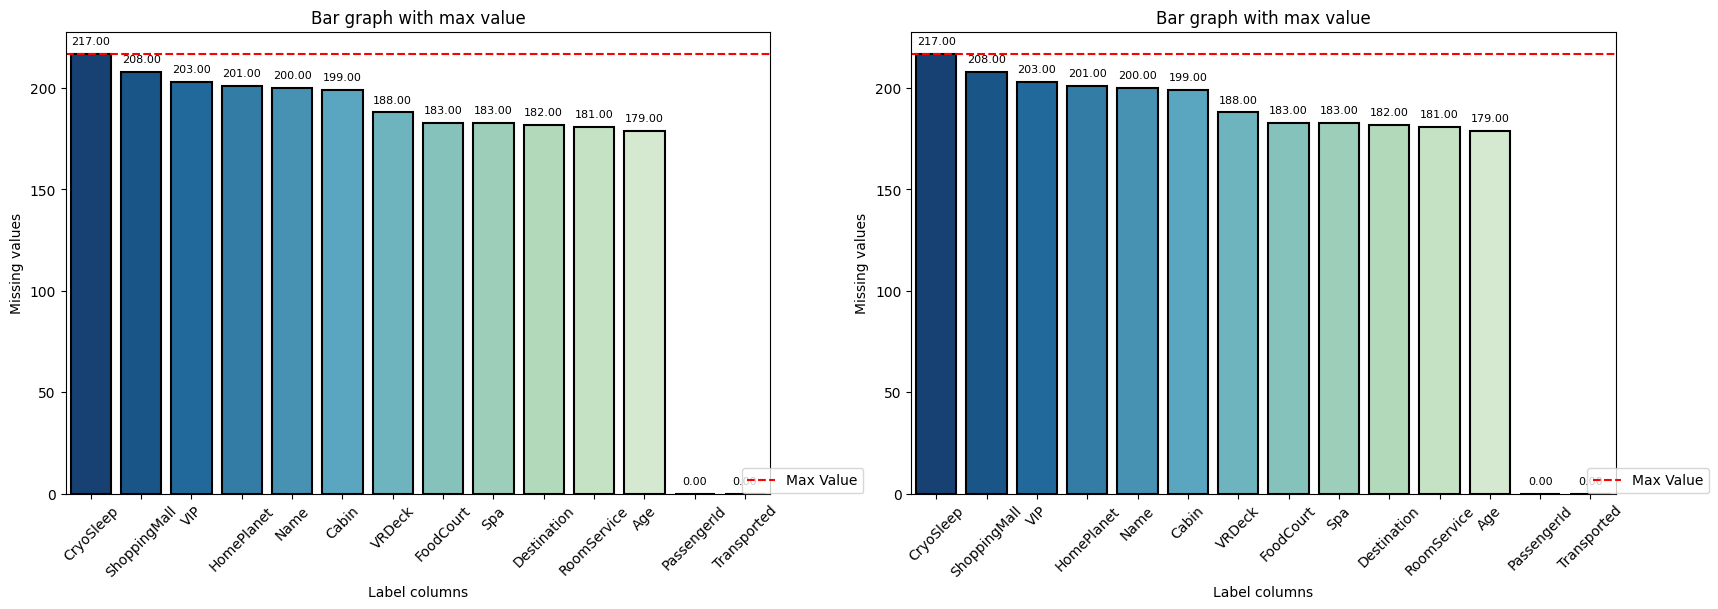

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

up.plot_bar_graph(train.isna().sum().tolist(),
               train.isna().columns.tolist(),
               'Missing values', 'Label columns', color = plt.cm.GnBu_r, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

up.plot_bar_graph(train.isna().sum().tolist(),
               train.isna().columns.tolist(),
               'Missing values', 'Label columns', color = plt.cm.GnBu_r, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()

/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities_plot.py:350: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='values', y='labels', data=data, palette=colors, ax=ax, edgecolor='black', linewidth=1.5)
/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities_plot.py:350: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='values', y='labels', data=data, palette=colors, ax=ax, edgecolor='black', linewidth=1.5)


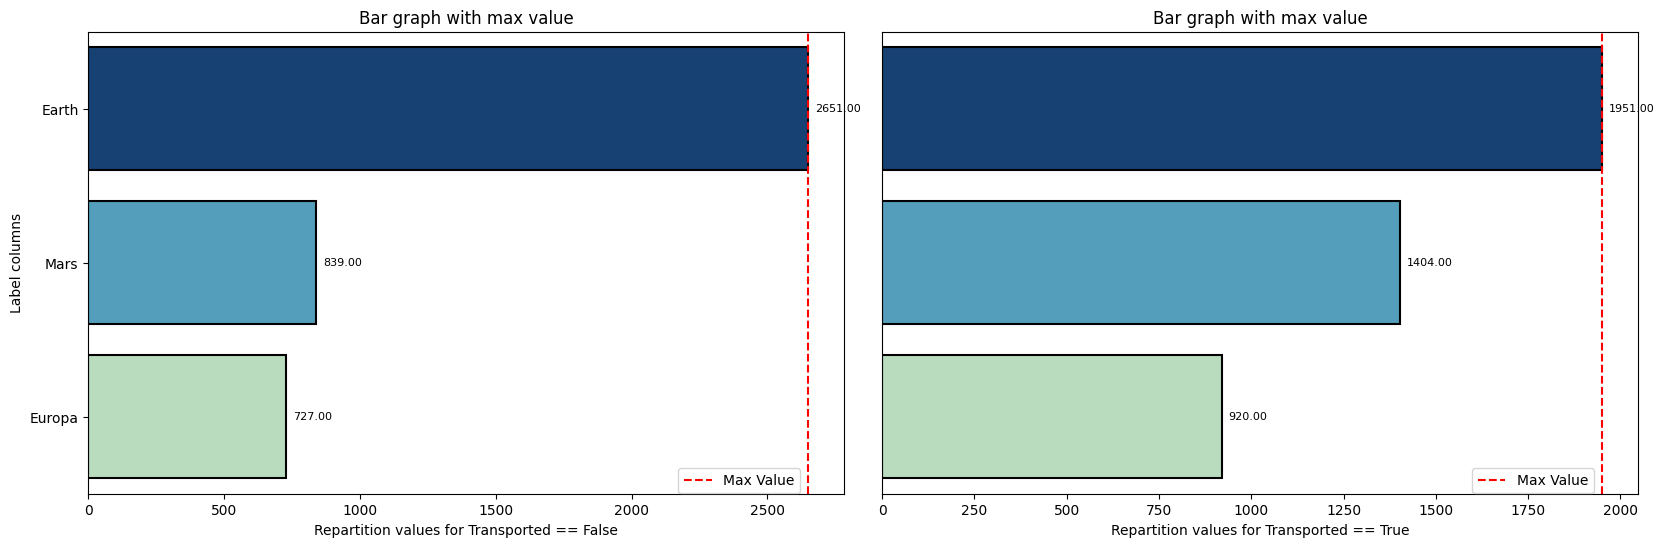

In [85]:
# We print the repartition of HomaPlanet depending on Transported or not

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax0 = up.plot_barh_graph(train[train['Transported'] == False].HomePlanet.value_counts().tolist(),
               train[train['Transported'] == False].HomePlanet.value_counts().index.tolist(),
               'Repartition values for Transported == False', 'Label columns', 
                color=plt.cm.GnBu_r, ax=axes[0])

ax1 = up.plot_barh_graph(train[train['Transported'] == True].HomePlanet.value_counts().tolist(),
               train[train['Transported'] == True].HomePlanet.value_counts().index.tolist(),
               'Repartition values for Transported == True', 'Label columns', 
                color=plt.cm.GnBu_r, ax=axes[1])

ax1.set_ylabel('')
plt.setp(ax1.get_yticklabels(), visible = False)
plt.setp(ax1.get_yticklines(), visible = False)
plt.subplots_adjust(wspace=0.05)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

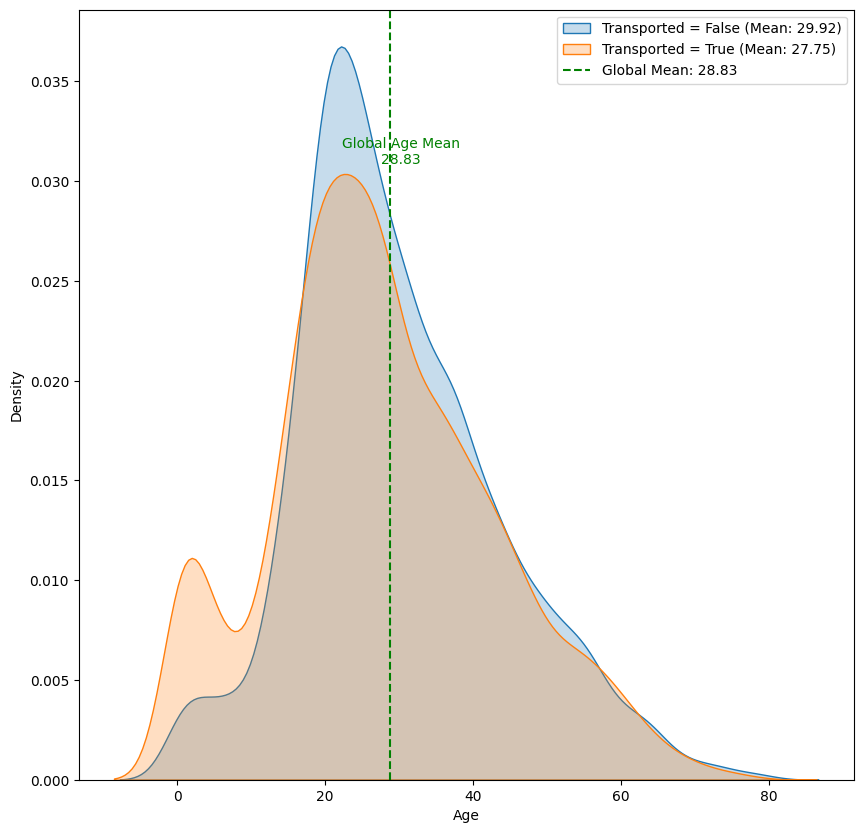

In [86]:
up.density_on_target(train, 'Transported', 'Age')

array([<Axes: title={'center': 'Transported = False'}, xlabel='Destination', ylabel='Count'>,
       <Axes: title={'center': 'Transported = True'}, xlabel='Destination', ylabel='count'>],
      dtype=object)

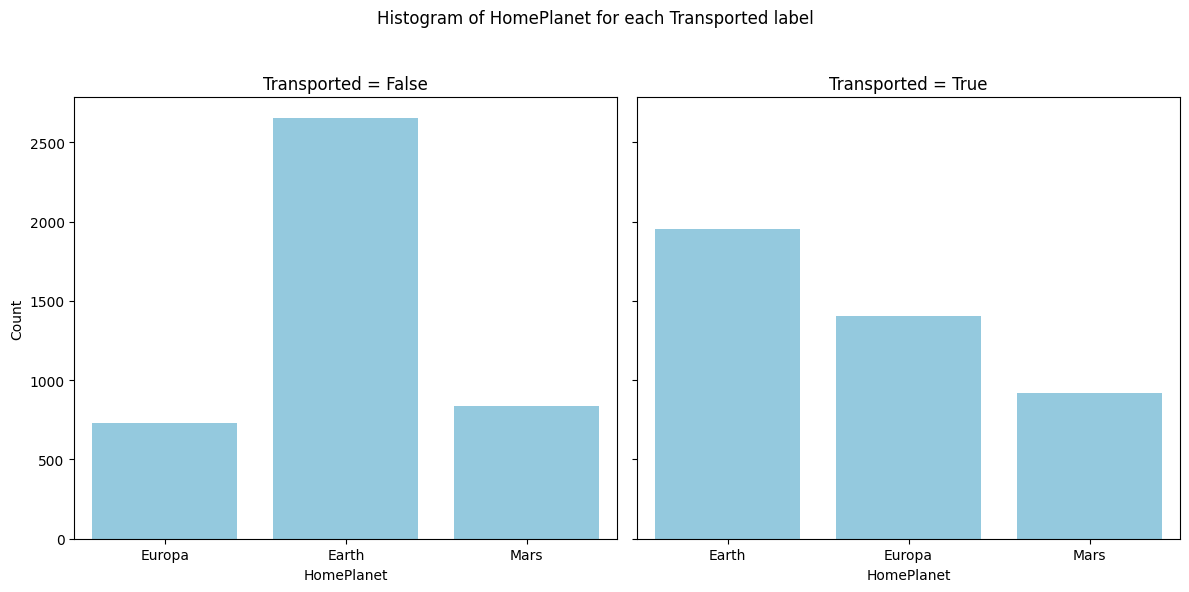

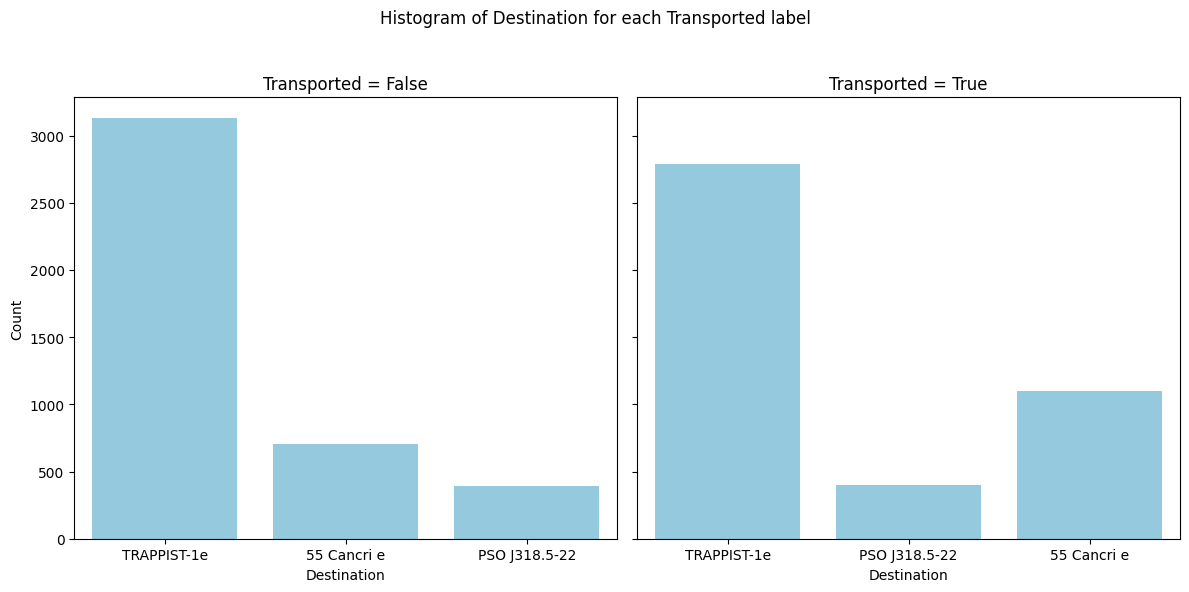

In [87]:
up.histogram_on_target(train, "Transported", "HomePlanet")
up.histogram_on_target(train, "Transported", "Destination")
#up.histogram_on_target(train, "Transported", "Cabin")


# Transform data
- ### keep first and last Cabin id : A/0/S -> A/S
- ### create total spend column
- ### get number of relatives

In [69]:
# transform function

def transform_data(data: pd.DataFrame):
    """
        Transform data

        Args:
            data (pd.DataFrame): 

        Returns:
            pd.DataFrame: the final transformed dataframe
    """
    
    data_copy                = data.copy()
    
    # keep the prefixe of the cabin
    data_copy.Cabin          = data_copy.Cabin.apply(lambda x: str(x)[0] + str(x)[-1])
    
    # add the total spent column
    data_copy["Total_spend"] = data_copy["RoomService"] + data_copy["FoodCourt"] + data_copy["ShoppingMall"] + data_copy["Spa"] + data_copy["VRDeck"]
    
    # add the number of relatives
    data_copy["Relatives"] = data_copy.PassengerId.apply(lambda x: x[-1])
    
    return data_copy
    

In [88]:
train_transfo = transform_data(train)
test_transfo = transform_data(test)

# Handle missing values
### Two parts : 
- ### 1. FillNa thanks to relatives
- ### 2. Fillna no relatives data

## 1. Fillna relatives

## - replace nan by mean of the relatives
## - replace nan by majority value of relatives

In [70]:
def fill_na_with_common(data: pd.DataFrame, column: str):
    """
    Fills missing values in a specified column with the most common value for categorical data
    or the mean for numerical data.
    """
    fill_value = data[column].mode()[0] if data[column].dtype == 'object' else data[column].mean()
    data[column].fillna(fill_value, inplace=True)

def fill_na_for_relatives(data: pd.DataFrame, id_column: str, columns_to_fill: list):
    """
    Fills missing values within each group of relatives defined by a shared identifier.

    Args:
        data (pd.DataFrame): DataFrame with the data to process.
        id_column (str): Column that identifies groups of relatives.
        columns_to_fill (list): List of columns for which missing values will be filled.
    """
    data_copy = data.copy()
    data_copy[id_column] = data_copy[id_column].astype(str).str[:4]  # Use common part of ID

    # Group by relatives' common ID
    for _, group in data_copy.groupby(id_column):
        if len(group) > 1:  # Process only groups with more than one relative
            for column in columns_to_fill:
                if group[column].isna().any() and group[column].notna().any():
                    fill_na_with_common(group, column)
            data.loc[group.index, columns_to_fill] = group[columns_to_fill]

    return data


In [89]:
# Example of how to use the function

columns_with_na_train = train_transfo.columns.tolist()  
train_transfo         = fill_na_for_relatives(train_transfo, id_column="PassengerId", columns_to_fill=columns_with_na_train)

columns_with_na_test = test_transfo.columns.tolist()  
train_transfo        = fill_na_for_relatives(train_transfo, id_column="PassengerId", columns_to_fill=columns_with_na_test)


/var/folders/vc/kyc23w1d2xv71xlg1pxxvq580000gn/T/ipykernel_1280/1733840316.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(fill_value, inplace=True)
/var/folders/vc/kyc23w1d2xv71xlg1pxxvq580000gn/T/ipykernel_1280/1733840316.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

## 2. Fillna global

In [90]:
train_transfo = utilities.fillna_process(train_transfo, False)
test_transfo  = utilities.fillna_process(test_transfo, False)

/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[key] = data[key].fillna(most_common)
/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[key] = data[key].fillna(most_common)
/Users/avicenne/Documents/python/kaggle-projects/classification-projects/Spaceship-titanic/../../utilities.py:92: FutureWarning: Downcasting object dtype ar

# Labelize data

In [91]:
# We save PassengerId for the submission test
train_encode = train_transfo.copy()
test_encode = test_transfo.copy()

PassengerId_test = test_encode.pop("PassengerId")
_ = test_encode.pop("Name")
_ = train_encode.pop("PassengerId")
_ = train_encode.pop("Name")

to_labelize = [key for key in train_encode if train_encode[key].dtype == 'object' or train_encode[key].dtype == 'category']
encode = LabelEncoder()

print('[INFO] : labelization in process : {}'.format(to_labelize))

for label in to_labelize:
  train_encode[label] = encode.fit_transform(train_encode[label])
  test_encode[label] = encode.transform(test_encode[label])

train_encode

[INFO] : labelization in process : ['HomePlanet', 'Cabin', 'Destination', 'Relatives']


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_spend,Relatives
0,1,False,2,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0
1,0,False,11,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,0
2,1,False,1,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0
3,1,False,1,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,1
4,0,False,11,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,8536.0,0
8689,0,True,13,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0
8690,0,False,13,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1873.0,0
8691,1,False,9,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4637.0,0


# Correlation matrix

correlation matrix :



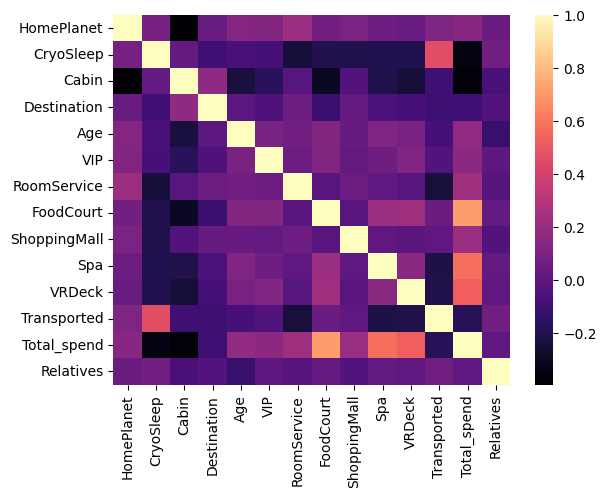

In [93]:
print("correlation matrix :" + "\n")
sns.heatmap(train_encode.corr(), cmap='magma')
plt.show()

# Split

In [94]:
y_train = train_encode.pop("Transported")

# we split
x_train, x_val, y_train, y_val = train_test_split(train_encode, y_train, test_size = 0.3, random_state = 42)

print("len x_train: ",x_train.shape)
print("len x_val: ", x_val.shape)
print("len label_train: ",y_train.shape)
print("len label_val: ", y_val.shape)

len x_train:  (6085, 13)
len x_val:  (2608, 13)
len label_train:  (6085,)
len label_val:  (2608,)


# Predict model

In [97]:
def train_model(model, cross_val: bool, x_train : pd.DataFrame = x_train, y_train : pd.Series = y_train, 
                x_val : pd.DataFrame = x_val, y_val : pd.Series = y_val):
    
    """train model

        Args:
            model (_type_): 
                the model we want
            cross_val (bool): 
                if we want the cross val
                
            x_train (pd.DataFrame, optional): 
                Defaults to x_train.
                
            y_train (pd.Series, optional): 
                Defaults to y_train.
                
            x_val (pd.DataFrame, optional):
                Defaults to x_val.
                
            y_val (pd.Series, optional):
                Defaults to y_val.
                
        Returns:
            the trained model
    """
    
    if cross_val:
        print("[INFO] : cross val score...")
        # Perform cross-validation
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV

        # Print each fold's score and the mean score
        print("Cross-validation scores for each fold:", cv_scores)
        print("Mean CV score:", cv_scores.mean())
        print("Standard deviation of CV scores:", cv_scores.std())
        print()

    print("[INFO] : train model...")
    model.fit(x_train, y_train)
    pred_cat = model.predict(x_val)
    print("[INFO] : end training")
    print()

    print("Accuracy : ",  accuracy_score(y_val, pred_cat))
    
    cm = confusion_matrix(y_val, pred_cat)
    sns.heatmap(cm,annot = True,fmt = ".1f")
    plt.show()
    
    return model

# Catboost

[INFO] : cross val score...
Cross-validation scores for each fold: [0.79539852 0.79211175 0.80032868 0.79293344 0.79375514]
Mean CV score: 0.7949055053410025
Standard deviation of CV scores: 0.002921345741106217

[INFO] : train model...
[INFO] : end training

Accuracy :  0.7906441717791411


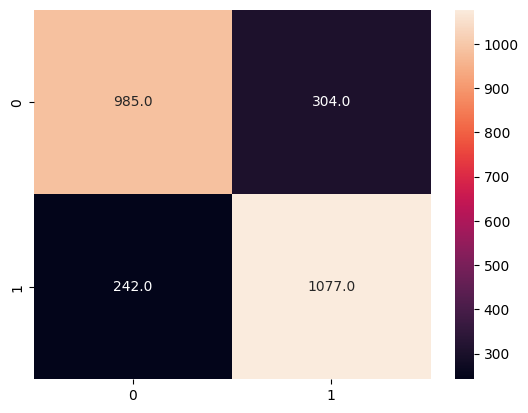

In [98]:
from catboost import CatBoostClassifier

Cat = CatBoostClassifier(iterations=3000,
                        learning_rate=0.1,
                        depth=3,random_seed=0, verbose=0)

Cat = train_model(Cat, True)


# XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=600,
                    max_depth=4,
                    learning_rate=0.04,
                    random_state=0)

XGB.fit(x_train, y_train)

predictions_xgb = XGB.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions_xgb))

pred = XGB.predict(test)

# Assuming test_preds contains your predictions
submission = pd.DataFrame({'PassengerId': PassengerId_test,
                           'Transported': pred})

# Save submission to a CSV file
submission.to_csv('submission.csv', index=False)

# Decision Tree

In [ ]:
# Decision Tree :

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)

predictions = model.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sb.heatmap(cm,annot = True,fmt = ".1f")
plt.show()

# Random Forest

In [ ]:
# random forest :

model1 = RandomForestClassifier(n_estimators = 100)

model1.fit(x_train, y_train)

predictions = model1.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sb.heatmap(cm,annot = True,fmt = ".1f")
plt.show()



# Logistic Regression

In [ ]:
# Logistic regression :

clf = LogisticRegression()
clf.fit(x_train, y_train)

pred = clf.predict(x_val)

accuracy_score(y_val, pred)

# We will fillna with the KNNImputer method

In [ ]:
# We define the new main function adapt for KnnImputer
def main_knn(train, test):
  """
  This is the main function, which take the train and test, clean them and return them

  Args:
      train (pd.Dataset) : the traindataset
      test (pd.Dataset) : the test dataset

  Returns:
      train : the dataset processed and labelized
      test : the dataset processed and labelized
  """

  # We save PassengerId for the submission test
  PassengerId_test = test.PassengerId

  Transported = train.Transported
  train = train.drop(['Transported'], axis=1)

  # We drop the non usefull label
  train = train.drop(['Name', 'PassengerId'], axis=1)
  test = test.drop(['Name', 'PassengerId'], axis=1)

  # We preprocess Cabin label
  train, test = preproccess_cabin(train, test)
  print('>---------------------------------------------------')
  print('Cabin1 and 3 created successfully !')
  print(('<---------------------------------------------------\n'))

  # We fill na with automatic KNNImputer function from utilities
  print('>---------------------------------------------------')
  train, test = utilities.pre_knnimput(train, test)
  print('Missing values after process : ')
  print(train.isna().any())


  return train, test, PassengerId_test, Transported

# Import datasets
train = pd.read_csv('/kaggle/input/spaceship-titanic-dataset/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic-dataset/test.csv')

train_knn, test_knn, PassengerId_test, Transported = main_knn(train, test)

# Predict model

In [17]:
# We split the train dataset into train and validation
from sklearn.model_selection import train_test_split

# we split the dataset
x_train_knn, x_val_knn, y_train_knn, y_val_knn = train_test_split(train_knn,
                                                  Transported,
                                                  test_size = 0.3,
                                                  random_state = 42)

# Comparison function between the 2 fillna method

In [18]:
def launch_model(model, x_train, y_train, x_val, y_val):
    
    model.fit(x_train, y_train)

    pred = model.predict(x_val)

    print('Accuracy for {} model'.format(model), accuracy_score(y_val, pred))
    return accuracy_score(y_val, pred)

In [ ]:
models = [LogisticRegression(max_iter = 10000), 
          RandomForestClassifier(n_estimators = 100), 
          DecisionTreeClassifier(criterion = 'entropy'),
          XGBClassifier(),
         lgb.LGBMClassifier(), CatBoostClassifier(iterations=3000,
                        learning_rate=0.1,
                        depth=3,random_seed=0, verbose=0)]

for model in models:
    print('For KnnImputer method')
    score0 = launch_model(model, x_train_knn, y_train_knn, x_val_knn, y_val_knn)
    print('For Fillna method')
    score1 = launch_model(model, x_train, y_train, x_val, y_val)
    
    print('>-------------------------------------------------------<\n')